In [ ]:
# 1)fetch one month of data of coronavirus from twitter before it's outbreak and after outbreak and compare peoples emotion
#               -Use NLTK library for tokenization and for stopwords.

In [4]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install GetOldTweets3

In [5]:
import GetOldTweets3 as got

In [25]:
def get_tweets():
    import GetOldTweets3 as got
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('Coronavirus') \
        .setSince("2020-03-01") \
        .setUntil("2020-03-20") \
        .setMaxTweets(200)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [26]:

# reading text file
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words = cleaned_text.split()

In [27]:
# Print texts
text_tweets

[["Emergency room physician: We're seeing people in their 40s on ventilators due to coronavirus - CNN Video "],
 ['Talk about what? First thing this guy says is there is no coronavirus “in his opinion.” Who is this person and why should I listen to a single thing they say?? '],
 ['COVID-19: Keeping safe and The Icehouse Community https://hubs.ly/H0nJ-TJ0 Now is the perfect time to update our network and friends on how we at The Icehouse are responding to the Coronavirus (COVID-19) situation. #covid-19 #theicehouse #strongertogether'],
 ['Watch This Epic Video Montage of Media Repeatedly Saying "Wuhan Coronavirus" - Before it was Considered Racist... Because Orange Man Bad https://www.thegatewaypundit.com/2020/03/watch-this-epic-video-montage-of-media-repeatedly-saying-wuhan-coronavirus-before-it-was-considered-racist-because-orange-man-bad/ via @gatewaypundit'],
 ['Two Lakers test positive for the coronavirus. The Lakers had 14 players tested for the coronavirus virus at the team’s pra

In [28]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [29]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)



Counter({' sad': 4, ' happy': 2, ' attracted': 1, ' bored': 1, ' fearless': 1, ' fearful': 1, ' powerless': 1, ' alone': 1})


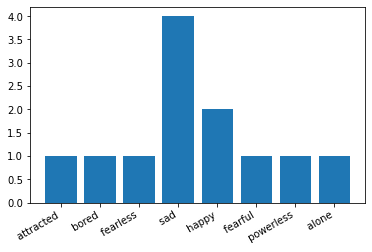

In [30]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

# #Pick your choice of document and update the emotion document accordingly (
# you document words and associated emotion where applicable) and analyse the sentiments of people

In [42]:
def get_tweets():
    import GetOldTweets3 as got
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#sushantsinghrajput') \
        .setSince("2020-06-14") \
        .setUntil("2020-08-10") \
        .setMaxTweets(400)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [43]:
# reading text file
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words = cleaned_text.split()

In [44]:
# Print texts
text_tweets

[['#Warriors4SSR #Warriors4Sushant #SushantSinghRajput Is this video a fact? '],
 ['So well explained. Very important this is. #SushantSinghRajput '],
 ['Request to the maker..@CastingChhabra There can be a 1 hour movie made just on behind the scenes/bloopers of #DilBechara..for #SushantSinghRajput #sushant fans and family.'],
 ['This song is 4 all #Warriors4SSR You won &amp; You got him the #CBI but now pls let them do their Job. Stop accusing people without solid proof cause even if 1 is innocent u do same what a fake #Metoo did to #SushantsinghRajput #vikasgupta #AnkitaLokhande pls Read #DishaSalian '],
 ['#SanjayRaut लगता है खुद को #महाभारत वाला संजय ही समझ बैठे हैं. अपनी दिव्य दृष्टि से मुंबई में बैठे बैठे उन्होंने #SushantSinghRajput के घर के अंदर झांक लिया था. उन्हें पता चल गया कि #सुशांत_सिंह_राजपूत के उनके पिता से संबध ठीक नहीं थे. बड़े मायावी हैं'],
 ['If there are 2 threads you read today. Let it be this thread and the thread within this thread ! #JusticeForSushantSinghRajpu

In [45]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [46]:
# Get emotions text
emotion_list = []
with open('emotions1.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' sad': 7, ' happy': 5, ' fearful': 4, ' esteemed': 3, ' focused': 2, ' free': 2, ' cheated': 1, ' fearless': 1, ' adequate': 1, ' average': 1, ' demoralized': 1, ' singled out': 1, ' lost': 1, ' hated': 1, ' independent': 1, ' anxious': 1, ' alone': 1, ' embarrassed': 1, ' unbiased': 1, ' love': 1})


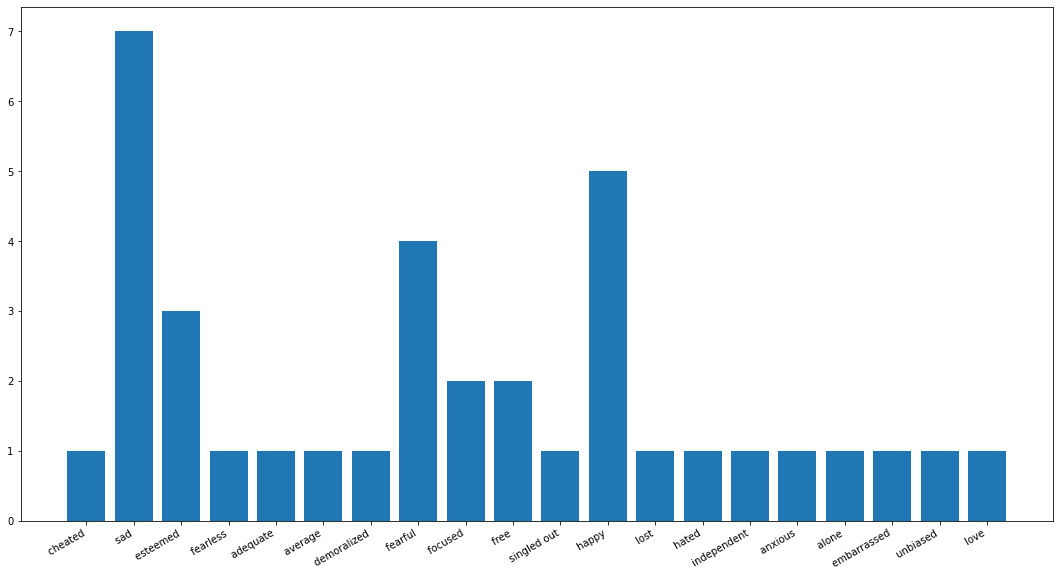

In [53]:

fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

3.pick your own document (say A) and create BOW using a count vectorizer. 
Use another document (say B) and 
identify how many words of the B document are present in the BOW of A.

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


In [68]:
A=['Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment']

In [76]:
vect1=CountVectorizer()


In [81]:
vect1.fit_transform(A)
print('bag of words :',vect1.get_feature_names())

bag of words : ['19', 'an', 'and', 'by', 'caused', 'coronavirus', 'covid', 'discovered', 'disease', 'experience', 'fall', 'infectious', 'is', 'mild', 'moderate', 'most', 'newly', 'people', 'recover', 'sick', 'special', 'symptoms', 'to', 'treatment', 'who', 'will', 'with', 'without']


In [82]:
vect1.vocabulary_

{'coronavirus': 5,
 'disease': 8,
 'covid': 6,
 '19': 0,
 'is': 12,
 'an': 1,
 'infectious': 11,
 'caused': 4,
 'by': 3,
 'newly': 16,
 'discovered': 7,
 'most': 15,
 'people': 17,
 'who': 24,
 'fall': 10,
 'sick': 19,
 'with': 26,
 'will': 25,
 'experience': 9,
 'mild': 13,
 'to': 22,
 'moderate': 14,
 'symptoms': 21,
 'and': 2,
 'recover': 18,
 'without': 27,
 'special': 20,
 'treatment': 23}

In [87]:
a_vect=CountVectorizer()
a_vect.fit(A)

CountVectorizer()

In [88]:
B=['The Novel Coronavirus (COVID-19) cases have been confirmed in large number of countries due to which the World Health Organisation (WHO) on 11.03.2020 has characterized COVID-19 as pandemic']

In [89]:
a_new_vect=a_vect.transform(B)
print('Text present at ',a_new_vect.toarray())

print('original indexes', vect1.get_feature_names())

Text present at  [[2 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]]
original indexes ['03', '11', '19', '2020', 'as', 'been', 'cases', 'characterized', 'confirmed', 'coronavirus', 'countries', 'covid', 'due', 'has', 'have', 'health', 'in', 'large', 'novel', 'number', 'of', 'on', 'organisation', 'pandemic', 'the', 'to', 'which', 'who', 'world']


In [90]:
stop_words = stopwords.words('english')
vect1 = CountVectorizer(stop_words=stop_words)
print (vect1)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])


In [91]:
vect1.fit_transform(A)
print("bag of words :",vect1.get_feature_names())
print("vocab        :",vect1.vocabulary_)

bag of words : ['19', 'caused', 'coronavirus', 'covid', 'discovered', 'disease', 'experience', 'fall', 'infectious', 'mild', 'moderate', 'newly', 'people', 'recover', 'sick', 'special', 'symptoms', 'treatment', 'without']
vocab        : {'coronavirus': 2, 'disease': 5, 'covid': 3, '19': 0, 'infectious': 8, 'caused': 1, 'newly': 11, 'discovered': 4, 'people': 12, 'fall': 7, 'sick': 14, 'experience': 6, 'mild': 9, 'moderate': 10, 'symptoms': 16, 'recover': 13, 'without': 18, 'special': 15, 'treatment': 17}


In [92]:
# Using function
def text_matrix(message, countvect):
    terms_doc = countvect.fit_transform(message)
    return pd.DataFrame(terms_doc.toarray(),columns=countvect.get_feature_names())

In [93]:
message=['Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment',
        'The Novel Coronavirus (COVID-19) cases have been confirmed in large number of countries due to which the World Health Organisation (WHO) on 11.03.2020 has characterized COVID-19 as pandemic']


In [94]:
c_vect = CountVectorizer()
print ("Below metrix is the Bag of Words approach")
text_matrix(message, c_vect)

Below metrix is the Bag of Words approach


,03,11,19,2020,an,and,as,been,by,cases,...,symptoms,the,to,treatment,which,who,will,with,without,world
0,0,0,2,0,1,1,0,0,1,0,...,1,0,1,1,0,1,1,1,1,0
1,1,1,2,1,0,0,1,1,0,1,...,0,2,1,0,1,1,0,0,0,1
